In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
steel_df = pd.read_csv('Steel_industry.csv', encoding='UTF-8-SIG')
steel_df.head(10)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01-01-2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01-01-2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01-01-2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01-01-2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01-01-2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [3]:
steel_df.shape

(35041, 11)

In [11]:
steel_df['Date_Time'] = pd.to_datetime(steel_df['Date_Time'], format='%d-%m-%Y %H:%M')
steel_df['Hour'] = steel_df['Date_Time'].dt.hour
steel_df['Month'] = steel_df['Date_Time'].dt.month
steel_df['Year'] = steel_df['Date_Time'].dt.year

In [5]:
steel_df.shape

(35041, 14)

In [24]:
steel_df.describe()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Hour,Month,Year
count,35041,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.0
mean,2018-07-02 11:59:59.589052928,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736,11.500243,6.526184,2018.0
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.0
25%,2018-04-02 06:00:00,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000,6.000000,4.000000,2018.0
50%,2018-07-02 12:00:00,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000,12.000000,7.000000,2018.0
75%,2018-10-01 18:00:00,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000,18.000000,10.000000,2018.0
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,23.000000,12.000000,2018.0
std,NaN,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915,6.922335,3.447975,0.0


In [4]:
num_cols = steel_df.select_dtypes(include=[np.number]).columns
corr = steel_df[num_cols].corr()['Usage_kWh'].sort_values(ascending=False)
print('Correlation with Usage_kWh:')
print(corr)

Correlation with Usage_kWh:
Usage_kWh                               1.000000
CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896151
Lagging_Current_Power_Factor            0.385932
Leading_Current_Power_Factor            0.353583
NSM                                     0.234581
Leading_Current_Reactive_Power_kVarh   -0.324941
Name: Usage_kWh, dtype: float64


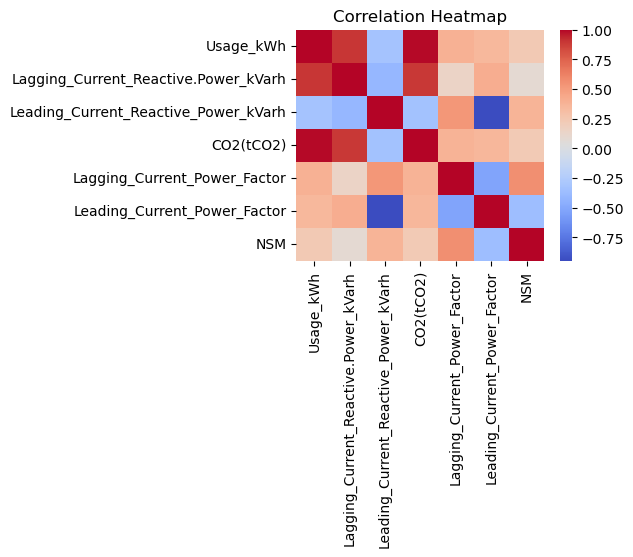

In [30]:
plt.figure(figsize=(4,3))
sns.heatmap(steel_df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

Load_Type
Light_Load      16.245344
Maximum_Load    44.910276
Medium_Load     38.844380
Name: Usage_kWh, dtype: float64


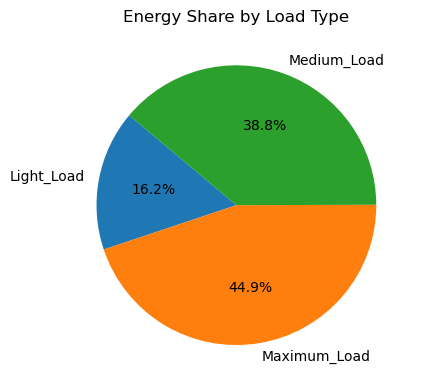

In [8]:
load_energy_share = (steel_df.groupby('Load_Type')['Usage_kWh'].sum() / steel_df['Usage_kWh'].sum()) * 100
print(load_energy_share)

load_energy_share.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(5,4))
plt.title('Energy Share by Load Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

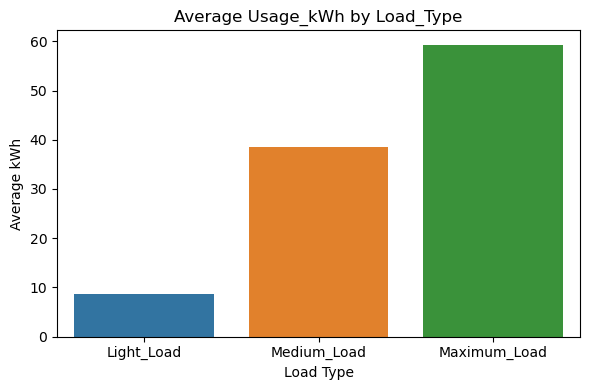

In [27]:
loadtype_avg = steel_df.groupby('Load_Type')['Usage_kWh'].mean().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=loadtype_avg.index, y=loadtype_avg.values)
plt.title('Average Usage_kWh by Load_Type')
plt.xlabel('Load Type')
plt.ylabel('Average kWh')
plt.tight_layout()
plt.show()

In [29]:
print(loadtype_avg)

Load_Type
Light_Load       8.625959
Medium_Load     38.445394
Maximum_Load    59.265314
Name: Usage_kWh, dtype: float64


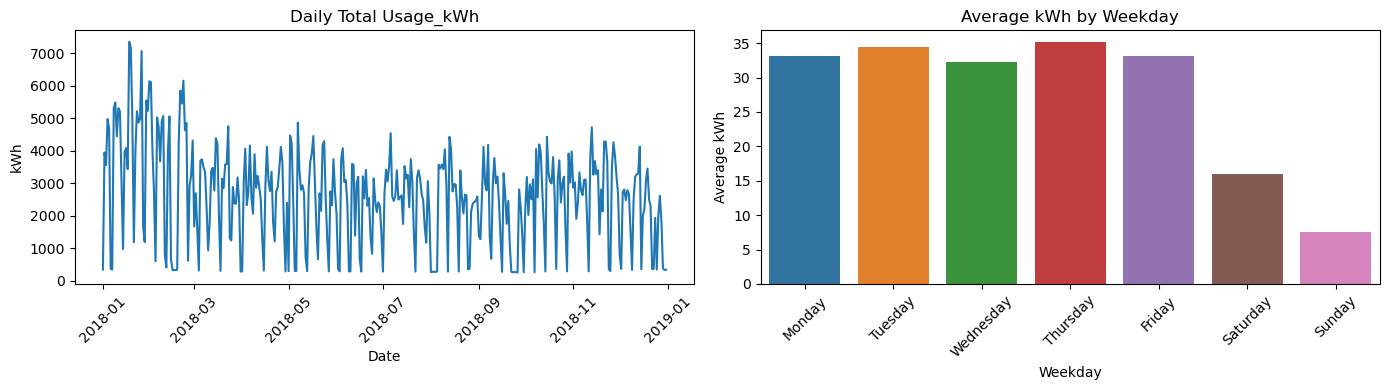

In [26]:
steel_df['Date'] = steel_df['Date_Time'].dt.date
steel_df['Weekday'] = steel_df['Date_Time'].dt.day_name()

daily_tot = steel_df.groupby('Date')['Usage_kWh'].sum()
weekday_avg = steel_df.groupby('Weekday')['Usage_kWh'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

fig, axes = plt.subplots(1,2, figsize=(14,4))
axes[0].plot(daily_tot.index, daily_tot.values)
axes[0].set_title('Daily Total Usage_kWh')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('kWh')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=weekday_avg.index, y=weekday_avg.values, ax=axes[1])
axes[1].set_title('Average kWh by Weekday')
axes[1].set_xlabel('Weekday')
axes[1].set_ylabel('Average kWh')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

              Lagging_Current_Power_Factor  Leading_Current_Power_Factor
Load_Type                                                               
Light_Load                       69.681223                     85.405545
Maximum_Load                     91.013417                     95.725678
Medium_Load                      93.064849                     73.908705


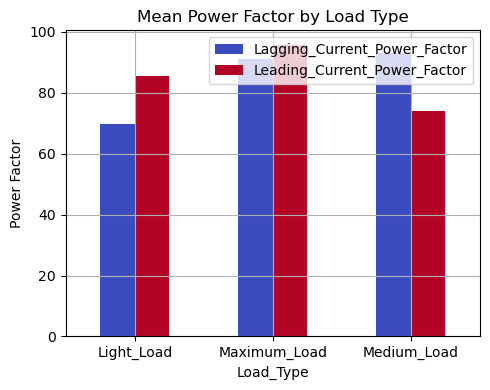

In [9]:
power_factor_means = steel_df.groupby('Load_Type')[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']].mean()
print(power_factor_means)

power_factor_means.plot(kind='bar', figsize=(5,4), colormap='coolwarm')
plt.title('Mean Power Factor by Load Type')
plt.ylabel('Power Factor')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

Hour
0      7.870075
1      6.072479
2      4.428390
3      4.358041
4      4.309438
5      4.245548
6      4.223705
7      4.502075
8     37.704795
9     58.551733
10    55.874733
11    57.097459
12    18.461000
13    39.019500
14    56.155260
15    55.637541
16    55.799582
17    43.833096
18    33.020932
19    38.208514
20    37.454415
21    13.777363
22     8.658918
23     7.998014
Name: Usage_kWh, dtype: float64


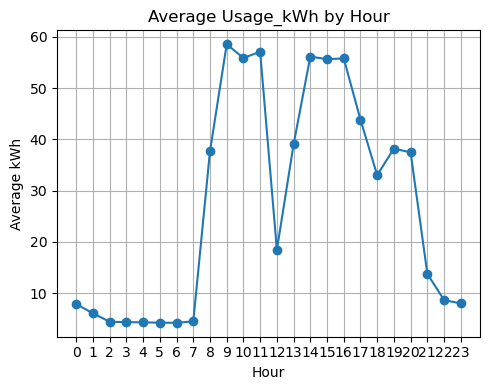

In [12]:
steel_df['Hour'] = pd.to_datetime(steel_df['Date_Time']).dt.hour
avg_usage_by_hour = steel_df.groupby('Hour')['Usage_kWh'].mean()
print(avg_usage_by_hour)

avg_usage_by_hour.plot(kind='line', marker='o', figsize=(5,4))
plt.title('Average Usage_kWh by Hour')
plt.xlabel('Hour')
plt.ylabel('Average kWh')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [15]:
steel_encoded = pd.get_dummies(steel_df[['Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','Hour','Month','WeekStatus','Day_Of_Week','Load_Type']], drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
X = steel_encoded.drop('Usage_kWh', axis=1)
y = steel_encoded['Usage_kWh']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [22]:
rf.score(X_test, y_test)*100

99.9239456306342

In [23]:
rf.score(X_train, y_train)*100

99.98831320319591

In [20]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:15]
print('Top Feature Importances:')
print(importances)

Top Feature Importances:
Lagging_Current_Reactive.Power_kVarh    0.871236
Lagging_Current_Power_Factor            0.091426
Leading_Current_Power_Factor            0.018337
Load_Type_Maximum_Load                  0.007808
Load_Type_Medium_Load                   0.006272
Month                                   0.002158
NSM                                     0.001668
Leading_Current_Reactive_Power_kVarh    0.000701
Hour                                    0.000156
Day_Of_Week_Saturday                    0.000071
Day_Of_Week_Sunday                      0.000052
WeekStatus_Weekend                      0.000037
Day_Of_Week_Tuesday                     0.000020
Day_Of_Week_Monday                      0.000020
Day_Of_Week_Thursday                    0.000019
dtype: float64


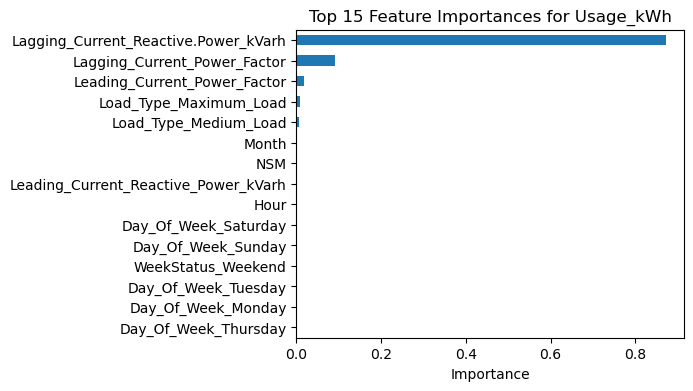

In [21]:
plt.figure(figsize=(5,4))
importances.sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances for Usage_kWh')
plt.xlabel('Importance')
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score
preds = rf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))
print('R2:', r2_score(y_test, preds))

MAE: 0.30294050699134384
R2: 0.9992394563063419
